In [1]:
 ## Projet Kangni-soukpe

!pip install pandas


In [2]:
## Creation de la base sql

import sqlite3

# Connexion à la base de données SQLite
conn = sqlite3.connect('/content/transactions.db')

# Création d'un curseur
cursor = conn.cursor()

In [3]:

# Création des tables

## Creation de la table clients

try:
  cursor.execute('''
    CREATE TABLE IF NOT EXISTS Clients (
        client_id INTEGER PRIMARY KEY AUTOINCREMENT,
        nom TEXT,
        prenom TEXT,
        age INTEGER,
        sexe TEXT,
        pays TEXT,
        revenu_annuel REAL
    )
''')

## Creation de la table Compte

  cursor.execute('''
    CREATE TABLE IF NOT EXISTS Comptes (
        compte_id INTEGER PRIMARY KEY AUTOINCREMENT,
        client_id INTEGER,
        type_compte TEXT,
        solde REAL,
        date_creation TEXT,
        FOREIGN KEY (client_id) REFERENCES Clients(client_id)
    )
''')

## Creation de la table transaction

  cursor.execute('''
    CREATE TABLE IF NOT EXISTS Transactions (
        transaction_id INTEGER PRIMARY KEY AUTOINCREMENT,
        compte_id INTEGER,
        montant REAL,
        date_transaction TEXT,
        type_transaction TEXT,
        lieu TEXT,
        fraude BOOLEAN,
        FOREIGN KEY (compte_id) REFERENCES Comptes(compte_id)
    )
''')

 # Validation des changements
  conn.commit()
  print("Tables créées avec succès.")

except sqlite3.Error as e:
    print(f"Erreur SQLite : {e}")

# Toujours fermer la connexion à la fin
finally:
    conn.close()


Tables créées avec succès.


In [4]:
import os
import sqlite3

# Supprimer l'ancienne base de données si elle existe
db_path = '/content/transactions.db'
if os.path.exists(db_path):
    os.remove(db_path)
    print(f"Base de données '{db_path}' supprimée.")

Base de données '/content/transactions.db' supprimée.


In [5]:
## Creation de la base sql

import sqlite3

# Connexion à la base de données SQLite
conn = sqlite3.connect(db_path)

# Création d'un curseur
cursor = conn.cursor()

In [6]:
import os
import sqlite3

# Recréation des nouvelles tables

## Creation de la table Clients
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Clients (
        client_id INTEGER PRIMARY KEY AUTOINCREMENT,
        nom TEXT,
        prenom TEXT,
        age INTEGER,
        sexe TEXT,
        pays TEXT,
        revenu_annuel REAL
    )
''')

## Creation de la table Comptes
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Comptes (
        compte_id INTEGER PRIMARY KEY AUTOINCREMENT,
        client_id INTEGER,
        type_compte TEXT,
        solde REAL,
        date_creation TEXT,
        FOREIGN KEY (client_id) REFERENCES Clients(client_id)
    )
''')

## Creation de la table transaction
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Transactions (
        transaction_id INTEGER PRIMARY KEY AUTOINCREMENT,
        compte_id INTEGER,
        montant REAL,
        date_transaction TEXT,
        type_transaction TEXT,
        lieu TEXT,
        fraude BOOLEAN,
        FOREIGN KEY (compte_id) REFERENCES Comptes(compte_id)
    )
''')

# Commit pour valider les changements
conn.commit()
print("Tables créées avec succès.")

# Vérification
print("Nouvelle base de données créée et tables initialisées avec succès.")




Tables créées avec succès.
Nouvelle base de données créée et tables initialisées avec succès.


In [7]:
import sqlite3

# Connexion à la base de données
conn = sqlite3.connect('/content/transactions.db')
cursor = conn.cursor()

try:
    # Insertion de données dans la table Clients
    cursor.execute('''
        INSERT INTO Clients (nom, prenom, age, sexe, pays, revenu_annuel)
        VALUES
        ('Dupont', 'Marie', 28, 'F', 'France', 35000),
        ('Martin', 'Pierre', 34, 'M', 'France', 45000),
        ('Leblanc', 'Claire', 41, 'F', 'France', 52000),
        ('Lemoine', 'Alexandre', 23, 'M', 'Belgique', 30000),
        ('Benoit', 'Sophie', 45, 'F', 'France', 60000),
        ('Dufresne', 'Julien', 38, 'M', 'Belgique', 40000),
        ('Michaud', 'Lucie', 32, 'F', 'France', 42000),
        ('Gauthier', 'Antoine', 29, 'M', 'France', 55000),
        ('Leclerc', 'Emilie', 36, 'F', 'Belgique', 38000),
        ('Tanguy', 'Louis', 50, 'M', 'France', 70000),
        ('Charlier', 'Elise', 40, 'F', 'Belgique', 48000),
        ('Dumont', 'Jean', 25, 'M', 'France', 33000),
        ('Fournier', 'Alice', 30, 'F', 'France', 39000),
        ('Boucher', 'Rémy', 47, 'M', 'Belgique', 55000),
        ('Girard', 'Laurent', 33, 'M', 'France', 46000),
        ('Vasseur', 'Caroline', 39, 'F', 'France', 49000),
        ('Charpentier', 'David', 42, 'M', 'Belgique', 53000),
        ('Roussel', 'Marc', 31, 'M', 'France', 36000),
        ('Lemoine', 'Valérie', 27, 'F', 'Belgique', 43000),
        ('Guerin', 'Patrick', 44, 'M', 'France', 48000),
        ('Mercier', 'Amandine', 35, 'F', 'France', 60000),
        ('Perrot', 'Maxime', 22, 'M', 'Belgique', 34000),
        ('Joly', 'Sébastien', 48, 'M', 'France', 68000),
        ('Lemoine', 'Bernadette', 54, 'F', 'Belgique', 75000),
        ('Marchand', 'Vincent', 38, 'M', 'France', 52000),
        ('Pires', 'Aurélie', 33, 'F', 'France', 46000),
        ('Durand', 'Jean-Pierre', 49, 'M', 'Belgique', 49000),
        ('Lebrun', 'Sandrine', 46, 'F', 'France', 56000),
        ('Aubert', 'Thierry', 53, 'M', 'Belgique', 62000),
        ('Legrand', 'Sylvie', 41, 'F', 'France', 54000)
    ''')

    # Insertion de données dans la table Comptes
    cursor.execute('''
        INSERT INTO Comptes (client_id, type_compte, solde, date_creation)
        VALUES
        (1, 'Courant', 1500.75, '2023-01-15'),
        (2, 'Épargne', 25000.40, '2022-06-23'),
        (3, 'Courant', 1200.50, '2023-03-05'),
        (4, 'Épargne', 5000.10, '2022-08-19'),
        (5, 'Courant', 2200.80, '2023-02-20'),
        (6, 'Épargne', 13000.15, '2022-12-14'),
        (7, 'Courant', 3100.25, '2023-05-01'),
        (8, 'Épargne', 5000.55, '2022-07-30'),
        (9, 'Courant', 4200.60, '2023-01-18'),
        (10, 'Épargne', 25000.00, '2022-11-10'),
        (11, 'Courant', 1800.75, '2023-02-25'),
        (12, 'Épargne', 12000.80, '2022-05-17'),
        (13, 'Courant', 5500.90, '2023-03-15'),
        (14, 'Épargne', 15000.25, '2022-10-01'),
        (15, 'Courant', 4200.10, '2023-04-12'),
        (16, 'Épargne', 8000.50, '2022-09-23'),
        (17, 'Courant', 3900.30, '2023-01-30'),
        (18, 'Épargne', 14000.80, '2022-08-14'),
        (19, 'Courant', 2500.90, '2023-02-05'),
        (20, 'Épargne', 7000.60, '2022-11-20'),
        (21, 'Courant', 3100.20, '2023-03-10'),
        (22, 'Épargne', 14000.90, '2022-12-02'),
        (23, 'Courant', 5600.70, '2023-01-25'),
        (24, 'Épargne', 17500.50, '2022-06-13'),
        (25, 'Courant', 4300.80, '2023-02-28'),
        (26, 'Épargne', 9500.40, '2022-07-07'),
        (27, 'Courant', 2700.60, '2023-01-10'),
        (28, 'Épargne', 17000.25, '2022-09-03'),
        (29, 'Courant', 3900.90, '2023-04-05'),
        (30, 'Épargne', 12000.75, '2022-11-15')
    ''')

    # Insertion de données dans la table Transactions
    cursor.execute('''
        INSERT INTO Transactions (compte_id, montant, date_transaction, type_transaction, lieu, fraude)
        VALUES
        (1, 200.00, '2025-02-10', 'Virement', 'Paris', 0),
        (2, 500.00, '2025-02-12', 'Retrait', 'Bruxelles', 1),
        (3, 150.00, '2025-02-14', 'Virement', 'Lyon', 0),
        (4, 1000.00, '2025-02-15', 'Retrait', 'Lille', 0),
        (5, 250.00, '2025-02-16', 'Virement', 'Paris', 0),
        (6, 1500.00, '2025-02-17', 'Retrait', 'Bruxelles', 0),
        (7, 200.00, '2025-02-18', 'Virement', 'Lyon', 0),
        (8, 1200.00, '2025-02-19', 'Retrait', 'Lille', 0),
        (9, 350.00, '2025-02-20', 'Virement', 'Paris', 0),
        (10, 500.00, '2025-02-21', 'Retrait', 'Bruxelles', 0),
        (11, 900.00, '2025-02-22', 'Virement', 'Lyon', 0),
        (12, 300.00, '2025-02-23', 'Retrait', 'Lille', 1),
        (13, 1500.00, '2025-02-24', 'Virement', 'Paris', 0),
        (14, 800.00, '2025-02-25', 'Retrait', 'Bruxelles', 0),
        (15, 600.00, '2025-02-26', 'Virement', 'Lyon', 0),
        (16, 400.00, '2025-02-27', 'Retrait', 'Lille', 0),
        (17, 220.00, '2025-02-28', 'Virement', 'Paris', 0),
        (18, 700.00, '2025-03-01', 'Retrait', 'Bruxelles', 0),
        (19, 500.00, '2025-03-02', 'Virement', 'Lyon', 0),
        (20, 300.00, '2025-03-03', 'Retrait', 'Lille', 1),
        (21, 250.00, '2025-03-04', 'Virement', 'Paris', 0),
        (22, 550.00, '2025-03-05', 'Retrait', 'Bruxelles', 0),
        (23, 200.00, '2025-03-06', 'Virement', 'Lyon', 0),
        (24, 1000.00, '2025-03-07', 'Retrait', 'Lille', 0),
        (25, 1200.00, '2025-03-08', 'Virement', 'Paris', 0),
        (26, 900.00, '2025-03-09', 'Retrait', 'Bruxelles', 0),
        (27, 750.00, '2025-03-10', 'Virement', 'Lyon', 0),
        (28, 600.00, '2025-03-11', 'Retrait', 'Lille', 1),
        (29, 1100.00, '2025-03-12', 'Virement', 'Paris', 0),
        (30, 400.00, '2025-03-13', 'Retrait', 'Bruxelles', 0)
    ''')

    # Commit pour enregistrer les données
    conn.commit()

    # Vérification de l'insertion : affichage des données dans la table Clients
    cursor.execute("SELECT * FROM Clients")
    print(cursor.fetchall())

except sqlite3.Error as e:
    print(f"Erreur d'insertion : {e}")
    conn.rollback()

finally:
    # Fermeture de la connexion
    conn.close()


[(1, 'Dupont', 'Marie', 28, 'F', 'France', 35000.0), (2, 'Martin', 'Pierre', 34, 'M', 'France', 45000.0), (3, 'Leblanc', 'Claire', 41, 'F', 'France', 52000.0), (4, 'Lemoine', 'Alexandre', 23, 'M', 'Belgique', 30000.0), (5, 'Benoit', 'Sophie', 45, 'F', 'France', 60000.0), (6, 'Dufresne', 'Julien', 38, 'M', 'Belgique', 40000.0), (7, 'Michaud', 'Lucie', 32, 'F', 'France', 42000.0), (8, 'Gauthier', 'Antoine', 29, 'M', 'France', 55000.0), (9, 'Leclerc', 'Emilie', 36, 'F', 'Belgique', 38000.0), (10, 'Tanguy', 'Louis', 50, 'M', 'France', 70000.0), (11, 'Charlier', 'Elise', 40, 'F', 'Belgique', 48000.0), (12, 'Dumont', 'Jean', 25, 'M', 'France', 33000.0), (13, 'Fournier', 'Alice', 30, 'F', 'France', 39000.0), (14, 'Boucher', 'Rémy', 47, 'M', 'Belgique', 55000.0), (15, 'Girard', 'Laurent', 33, 'M', 'France', 46000.0), (16, 'Vasseur', 'Caroline', 39, 'F', 'France', 49000.0), (17, 'Charpentier', 'David', 42, 'M', 'Belgique', 53000.0), (18, 'Roussel', 'Marc', 31, 'M', 'France', 36000.0), (19, 'Lem

In [8]:
## Affichage de ma table

import sqlite3

# Connexion à la base de données
conn = sqlite3.connect('/content/transactions.db')
cursor = conn.cursor()

try:
    # Affichage de la table Clients
    cursor.execute("SELECT * FROM Clients")
    clients = cursor.fetchall()
    print("Données de la table Clients :")
    for client in clients:
        print(client)

    # Affichage de la table Comptes
    cursor.execute("SELECT * FROM Comptes")
    comptes = cursor.fetchall()
    print("\nDonnées de la table Comptes :")
    for compte in comptes:
        print(compte)

    # Affichage de la table Transactions
    cursor.execute("SELECT * FROM Transactions")
    transactions = cursor.fetchall()
    print("\nDonnées de la table Transactions :")
    for transaction in transactions:
        print(transaction)

except sqlite3.Error as e:
    print(f"Erreur lors de la récupération des données : {e}")

finally:
    # Fermeture de la connexion
    conn.close()


Données de la table Clients :
(1, 'Dupont', 'Marie', 28, 'F', 'France', 35000.0)
(2, 'Martin', 'Pierre', 34, 'M', 'France', 45000.0)
(3, 'Leblanc', 'Claire', 41, 'F', 'France', 52000.0)
(4, 'Lemoine', 'Alexandre', 23, 'M', 'Belgique', 30000.0)
(5, 'Benoit', 'Sophie', 45, 'F', 'France', 60000.0)
(6, 'Dufresne', 'Julien', 38, 'M', 'Belgique', 40000.0)
(7, 'Michaud', 'Lucie', 32, 'F', 'France', 42000.0)
(8, 'Gauthier', 'Antoine', 29, 'M', 'France', 55000.0)
(9, 'Leclerc', 'Emilie', 36, 'F', 'Belgique', 38000.0)
(10, 'Tanguy', 'Louis', 50, 'M', 'France', 70000.0)
(11, 'Charlier', 'Elise', 40, 'F', 'Belgique', 48000.0)
(12, 'Dumont', 'Jean', 25, 'M', 'France', 33000.0)
(13, 'Fournier', 'Alice', 30, 'F', 'France', 39000.0)
(14, 'Boucher', 'Rémy', 47, 'M', 'Belgique', 55000.0)
(15, 'Girard', 'Laurent', 33, 'M', 'France', 46000.0)
(16, 'Vasseur', 'Caroline', 39, 'F', 'France', 49000.0)
(17, 'Charpentier', 'David', 42, 'M', 'Belgique', 53000.0)
(18, 'Roussel', 'Marc', 31, 'M', 'France', 36000.0

In [9]:
## Identifier les valeurs manquantes de ma base

import pandas as pd

# connexion a ma base de données
conn = sqlite3.connect('/content/transactions.db')
cursor = conn.cursor()

# Chargement des tables dans des DataFrames
clients_df = pd.read_sql_query("SELECT * FROM Clients", conn)
comptes_df = pd.read_sql_query("SELECT * FROM Comptes", conn)
transactions_df = pd.read_sql_query("SELECT * FROM Transactions", conn)

# Vérification des valeurs manquantes
print("Clients :\n", clients_df.isnull().sum())
print("\nComptes :\n", comptes_df.isnull().sum())
print("\nTransactions :\n", transactions_df.isnull().sum())

# Fermeture de la connexion
conn.close()


Clients :
 client_id        0
nom              0
prenom           0
age              0
sexe             0
pays             0
revenu_annuel    0
dtype: int64

Comptes :
 compte_id        0
client_id        0
type_compte      0
solde            0
date_creation    0
dtype: int64

Transactions :
 transaction_id      0
compte_id           0
montant             0
date_transaction    0
type_transaction    0
lieu                0
fraude              0
dtype: int64


In [10]:
## Calcul des moyennes, médianes, variances.....

# Connexion à ma  base
conn = sqlite3.connect('/content/transactions.db')

# Chargement de la table Transactions
transactions_df = pd.read_sql_query("SELECT * FROM Transactions", conn)


print(transactions_df.describe())



       transaction_id  compte_id      montant     fraude
count       30.000000  30.000000    30.000000  30.000000
mean        15.500000  15.500000   634.000000   0.133333
std          8.803408   8.803408   396.307091   0.345746
min          1.000000   1.000000   150.000000   0.000000
25%          8.250000   8.250000   300.000000   0.000000
50%         15.500000  15.500000   525.000000   0.000000
75%         22.750000  22.750000   900.000000   0.000000
max         30.000000  30.000000  1500.000000   1.000000


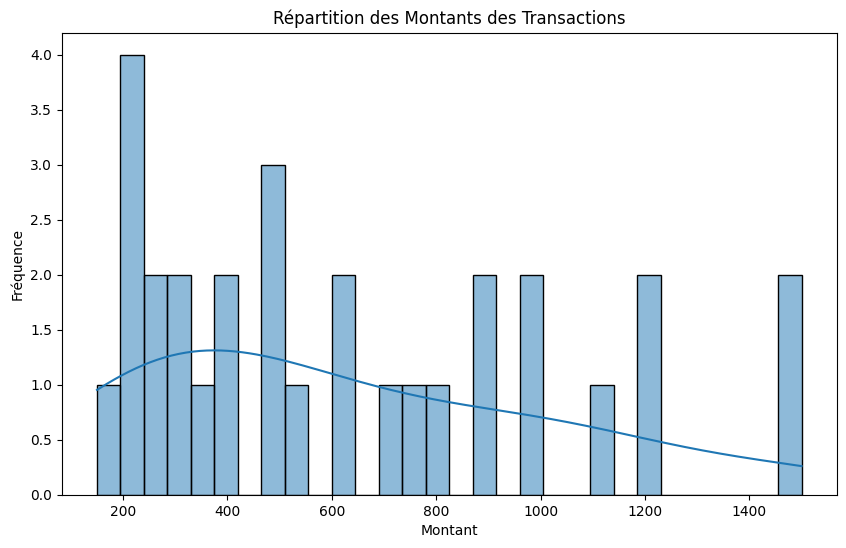

In [11]:
## Utilisation  des graphiques pour comprendre les tendances

import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation de la répartition des montants de transactions
plt.figure(figsize=(10,6))
sns.histplot(transactions_df['montant'], bins=30, kde=True)
plt.title('Répartition des Montants des Transactions')
plt.xlabel('Montant')
plt.ylabel('Fréquence')
plt.show()

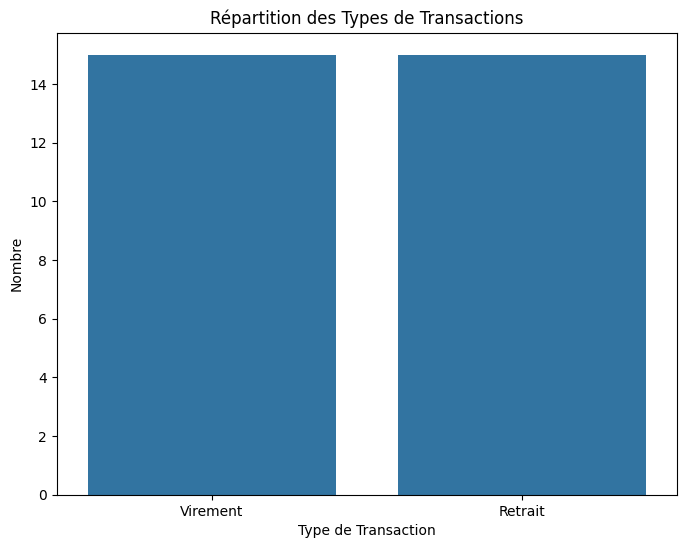

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation des transactions par type
plt.figure(figsize=(8,6))
sns.countplot(x='type_transaction', data=transactions_df)
plt.title('Répartition des Types de Transactions')
plt.xlabel('Type de Transaction')
plt.ylabel('Nombre')
plt.show()

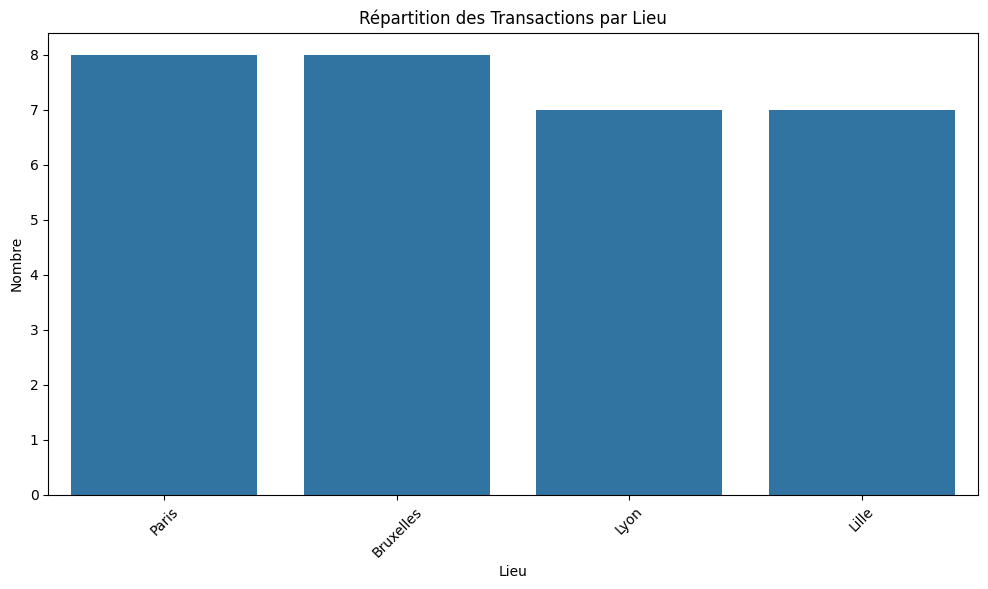

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns



# Visualisation des transactions par lieu
plt.figure(figsize=(12,6))
sns.countplot(x='lieu', data=transactions_df, order=transactions_df['lieu'].value_counts().index)
plt.title('Répartition des Transactions par Lieu')
plt.xlabel('Lieu')
plt.ylabel('Nombre')
plt.xticks(rotation=45)
plt.show()


conn.close()

In [14]:
import sqlite3

# Connexion à la base de données
conn = sqlite3.connect('/content/transactions.db')

# Vérifier les tables présentes dans la base de données
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)

# Afficher la liste des tables
print(tables)


              name
0          Clients
1  sqlite_sequence
2          Comptes
3     Transactions


In [15]:
## Affichage des informationn de ma base de données

# Charger les données pour chaque table
clients_df = pd.read_sql_query("SELECT * FROM Clients", conn)
comptes_df = pd.read_sql_query("SELECT * FROM Comptes", conn)
transactions_df = pd.read_sql_query("SELECT * FROM Transactions", conn)

# Afficher un aperçu de chaque DataFrame pour vérifier qu'ils sont bien chargés
print("Clients data:", clients_df.head())
print("Comptes data:", comptes_df.head())
print("Transactions data:", transactions_df.head())


Clients data:    client_id      nom     prenom  age sexe      pays  revenu_annuel
0          1   Dupont      Marie   28    F    France        35000.0
1          2   Martin     Pierre   34    M    France        45000.0
2          3  Leblanc     Claire   41    F    France        52000.0
3          4  Lemoine  Alexandre   23    M  Belgique        30000.0
4          5   Benoit     Sophie   45    F    France        60000.0
Comptes data:    compte_id  client_id type_compte     solde date_creation
0          1          1     Courant   1500.75    2023-01-15
1          2          2     Épargne  25000.40    2022-06-23
2          3          3     Courant   1200.50    2023-03-05
3          4          4     Épargne   5000.10    2022-08-19
4          5          5     Courant   2200.80    2023-02-20
Transactions data:    transaction_id  compte_id  montant date_transaction type_transaction  \
0               1          1    200.0       2025-02-10         Virement   
1               2          2    500

In [18]:
# Fusionner mes tables
data_df = pd.merge(transactions_df, comptes_df, on='compte_id', how='left')
data_df = pd.merge(data_df, clients_df, on='client_id', how='left')

# Afficher un aperçu des données fusionnées
print(data_df.head())


   transaction_id  compte_id  montant date_transaction type_transaction  \
0               1          1    200.0       2025-02-10         Virement   
1               2          2    500.0       2025-02-12          Retrait   
2               3          3    150.0       2025-02-14         Virement   
3               4          4   1000.0       2025-02-15          Retrait   
4               5          5    250.0       2025-02-16         Virement   

        lieu  fraude  client_id type_compte     solde date_creation      nom  \
0      Paris       0          1     Courant   1500.75    2023-01-15   Dupont   
1  Bruxelles       1          2     Épargne  25000.40    2022-06-23   Martin   
2       Lyon       0          3     Courant   1200.50    2023-03-05  Leblanc   
3      Lille       0          4     Épargne   5000.10    2022-08-19  Lemoine   
4      Paris       0          5     Courant   2200.80    2023-02-20   Benoit   

      prenom  age sexe      pays  revenu_annuel  
0      Marie   28 

In [71]:
## Sélection des  variables pertinentes

features = data_df[['montant', 'type_transaction', 'lieu', 'revenu_annuel']].copy()
target = data_df['fraude']

# Encodage des variables catégorielles
label_encoder = LabelEncoder()

# Encoder 'type_transaction' et 'lieu'
features['type_transaction'] = label_encoder.fit_transform(features['type_transaction'])
features['lieu'] = label_encoder.fit_transform(features['lieu'])

# Afficher un aperçu des données après transformation
print(features.head())


   montant  type_transaction  lieu  revenu_annuel
0    200.0                 1     3        35000.0
1    500.0                 0     0        45000.0
2    150.0                 1     2        52000.0
3   1000.0                 0     1        30000.0
4    250.0                 1     3        60000.0


In [20]:
## Division des données en ensembles d'entraînement et de test

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
# Séparer les variables (features) et la cible (target)
X = features
y = target


In [41]:
##
# Diviser les données en 80% pour l'entraînement et 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = model.predict(X_test)


In [42]:
# Évaluation du modèle
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.67      0.59       105
           1       0.51      0.37      0.43       101

    accuracy                           0.52       206
   macro avg       0.52      0.52      0.51       206
weighted avg       0.52      0.52      0.51       206

Confusion Matrix:
[[70 35]
 [64 37]]


In [43]:
from sklearn.model_selection import GridSearchCV

# Définir les paramètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Créer le modèle RandomForest
rf_model = RandomForestClassifier(random_state=42)

# Configurer GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Lancer la recherche sur les meilleurs hyperparamètres
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres : ", grid_search.best_params_)

# Utiliser le meilleur modèle trouvé
best_rf_model = grid_search.best_estimator_

# Évaluer les performances sur le jeu de test
y_pred_best = best_rf_model.predict(X_test)
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Meilleurs paramètres :  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.54      0.69      0.61       105
           1       0.55      0.40      0.46       101

    accuracy                           0.54       206
   macro avg       0.54      0.54      0.53       206
weighted avg       0.54      0.54      0.53       206



In [44]:
!pip install faker


In [45]:
## Générer un plus grand nombre de données

import random
import pandas as pd
from faker import Faker

# Initialiser Faker pour générer des données réalistes
fake = Faker()


def generate_data(num_records):
    data = []
    for _ in range(num_records):
        client_id = random.randint(1, 30)  # 30 clients différents
        montant = random.uniform(50, 5000)  # Montant transactionnel entre 50 et 5000
        type_transaction = random.choice(['Retrait', 'Virement', 'Paiement'])
        lieu = random.choice(['Paris', 'Bruxelles', 'Lyon', 'Lille'])
        fraude = random.choice([0, 1])  # 0 = non fraude, 1 = fraude
        revenu_annuel = fake.random_number(digits=5)
        data.append([client_id, montant, type_transaction, lieu, fraude, revenu_annuel])

    # Créer un DataFrame
    return pd.DataFrame(data, columns=['client_id', 'montant', 'type_transaction', 'lieu', 'fraude', 'revenu_annuel'])

# Générer 1000 enregistrements supplémentaires pour simuler un grand flux de données
larger_data_df = generate_data(1000)
print(larger_data_df.head())


   client_id      montant type_transaction       lieu  fraude  revenu_annuel
0         24  2077.133993         Virement      Lille       0          20854
1          4  2148.923593         Virement      Lille       1          14699
2         25  3994.656315         Paiement      Lille       1          49928
3         13  2310.089879         Paiement  Bruxelles       1          49195
4          6  3094.077877          Retrait       Lyon       0          60361


In [46]:
# Concaténer les nouvelles données avec les anciennes
full_data_df = pd.concat([data_df, larger_data_df], ignore_index=True)


In [47]:
## Utilisation de Scikit-Learn pour entraîner le modèle de détection de fraude

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Sélectionner les features et la cible
features = full_data_df[['montant', 'type_transaction', 'lieu', 'revenu_annuel']]
target = full_data_df['fraude']

# Encodage des variables catégorielles
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
features.loc[:, 'type_transaction'] = label_encoder.fit_transform(features['type_transaction'])
features.loc[:, 'lieu'] = label_encoder.fit_transform(features['lieu'])


# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Créer et entraîner le modèle RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédire les résultats
y_pred = model.predict(X_test)

# Évaluer les performances du modèle
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.51      0.64      0.57       155
           1       0.52      0.39      0.44       154

    accuracy                           0.51       309
   macro avg       0.52      0.51      0.51       309
weighted avg       0.52      0.51      0.51       309



In [48]:
## Connexion a ma base de données
import sqlite3

# Se connecter à la base de données (remplace le chemin si nécessaire)
conn = sqlite3.connect('/content/transactions.db')

# Créer un curseur pour exécuter les requêtes SQL
cursor = conn.cursor()


In [49]:
## Exécution de la  requête SQL

# Exemple : obtenir le total des transactions
cursor.execute('SELECT COUNT(*) FROM Transactions')

# Récupérer le résultat
result = cursor.fetchone()

# Afficher le résultat
print("Nombre total de transactions:", result[0])


Nombre total de transactions: 30


In [50]:
import pandas as pd

# Lire une requête SQL et la mettre dans un DataFrame
df = pd.read_sql_query('''
SELECT
    type_transaction,
    COUNT(*) AS total_transactions,
    SUM(CASE WHEN fraude = 1 THEN 1 ELSE 0 END) AS fraudulent_transactions
FROM Transactions
GROUP BY type_transaction;
''', conn)

# Afficher les résultats dans un DataFrame
print(df)


  type_transaction  total_transactions  fraudulent_transactions
0          Retrait                  15                        4
1         Virement                  15                        0


In [51]:

conn.close()


In [52]:
## Optimisation des hyperparamètres du modèle

from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Créer un GridSearchCV pour trouver les meilleurs paramètres
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)

# Entraîner avec GridSearchCV
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres : ", grid_search.best_params_)

# Utiliser les meilleurs paramètres pour entraîner un nouveau modèle
best_model = grid_search.best_estimator_

# Prédire les résultats avec le meilleur modèle
y_pred_best = best_model.predict(X_test)

# Évaluer les performances du meilleur modèle
print(classification_report(y_test, y_pred_best))


Meilleurs paramètres :  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.49      0.60      0.54       155
           1       0.48      0.37      0.42       154

    accuracy                           0.49       309
   macro avg       0.48      0.49      0.48       309
weighted avg       0.48      0.49      0.48       309



In [53]:
##  Vérification de l'importance des features

# Afficher l'importance des features
importances = model.feature_importances_

# Créer un DataFrame pour afficher les importances
importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': importances
})

# Trier les features par ordre d'importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


            Feature  Importance
3     revenu_annuel    0.447559
0           montant    0.409594
2              lieu    0.078585
1  type_transaction    0.064262


In [54]:
# Équilibrage des données

from imblearn.over_sampling import SMOTE

# Appliquer SMOTE pour équilibrer les classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Créer et entraîner le modèle sur les données équilibrées
model_smote = RandomForestClassifier(n_estimators=100, random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

# Prédire et évaluer sur les données de test
y_pred_smote = model_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote))


              precision    recall  f1-score   support

           0       0.52      0.65      0.58       155
           1       0.52      0.38      0.44       154

    accuracy                           0.52       309
   macro avg       0.52      0.52      0.51       309
weighted avg       0.52      0.52      0.51       309



In [55]:
from sklearn.model_selection import cross_val_score

# Effectuer une validation croisée
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"Scores de validation croisée : {cross_val_scores}")
print(f"Score moyen de validation croisée : {cross_val_scores.mean()}")


Scores de validation croisée : [0.53793103 0.56944444 0.5625     0.51388889 0.54166667]
Score moyen de validation croisée : 0.5450862068965516


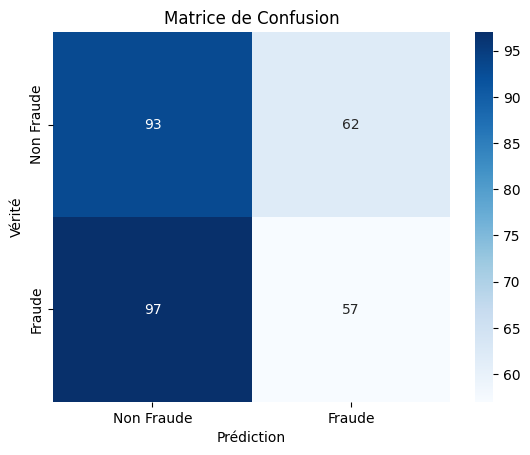

In [56]:
## Évaluation sur d'autres métriques

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Afficher la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Créer un heatmap pour afficher la matrice de confusion
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Fraude', 'Fraude'], yticklabels=['Non Fraude', 'Fraude'])
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.title('Matrice de Confusion')
plt.show()



In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE  # Assurez-vous que SMOTE est importé

# Vérifier si X_train et y_train existent avant l'échantillonnage
print(type(X_train), type(y_train))
print(X_train.shape, y_train.shape)

# Application de SMOTE pour rééchantillonner les données (si tu utilises SMOTE)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Vérification après rééchantillonnage
print(type(X_train_resampled), type(y_train_resampled))
print(X_train_resampled.shape, y_train_resampled.shape)

# Paramètres à tester
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Effectuer la recherche
grid_search.fit(X_train_resampled, y_train_resampled)

# Afficher les meilleurs paramètres
print(f"Meilleurs paramètres : {grid_search.best_params_}")


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(721, 4) (721,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(754, 4) (754,)
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Meilleurs paramètres : {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [61]:
## Entraîner le modèle avec les meilleurs paramètres

# Utiliser les meilleurs paramètres pour entraîner le modèle
best_model = RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=2, n_estimators=150, random_state=42)
best_model.fit(X_train_resampled, y_train_resampled)

# Prédire les résultats
y_pred_best = best_model.predict(X_test)

# Évaluer les performances du modèle
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best))




              precision    recall  f1-score   support

           0       0.49      0.61      0.55       155
           1       0.48      0.36      0.41       154

    accuracy                           0.49       309
   macro avg       0.49      0.49      0.48       309
weighted avg       0.49      0.49      0.48       309



In [84]:
import pandas as pd

best_model = grid_search.best_estimator_

# Obtenir l'importance des features
feature_importances = best_model.feature_importances_

features = pd.DataFrame(X_train_resampled)

# Créer un DataFrame avec l'importance des features
feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': feature_importances
})

# Trier les features par ordre d'importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Afficher l'importance des features
print(feature_importance_df)


            Feature  Importance
3     revenu_annuel    0.429798
0           montant    0.406828
2              lieu    0.092232
1  type_transaction    0.071142


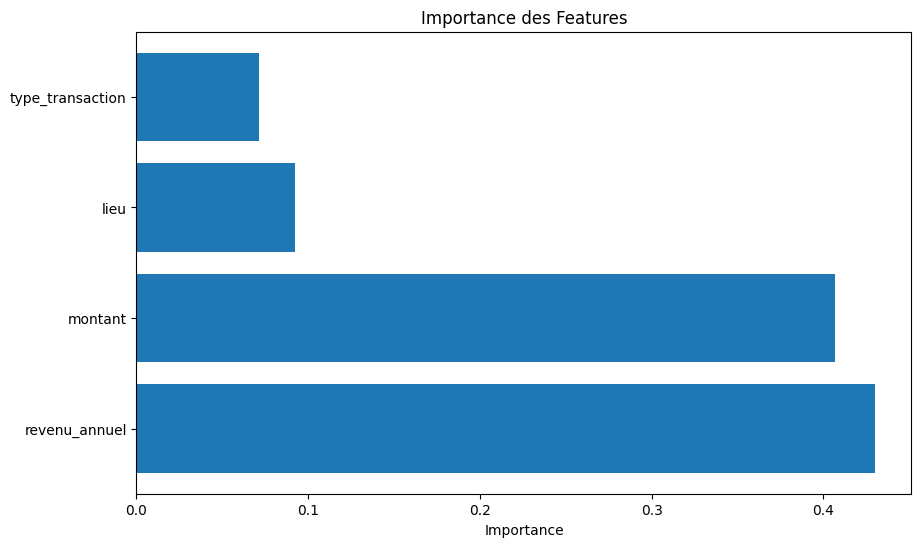

In [110]:
##  visualisation de  l'importance des features avec un graphique

import matplotlib.pyplot as plt

# Tracer l'importance des features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Importance des Features')
plt.show()


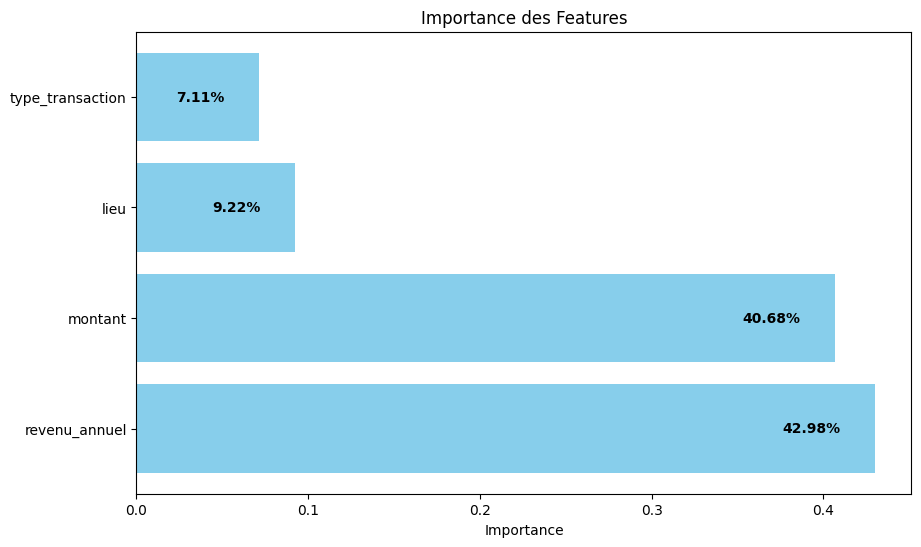

In [91]:
# Tracer l'importance des features avec les pourcentages
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')

# Ajouter les pourcentages sur les barres
for bar in bars:
    width = bar.get_width()
    plt.text(width - 0.02, bar.get_y() + bar.get_height() / 2, f'{width:.2%}',
             va='center', ha='right', color='black', fontweight='bold')

plt.xlabel('Importance')
plt.title('Importance des Features')
plt.show()


In [89]:
## Affichage des informationn de ma base de données

# Charger les données pour chaque table
clients_df = pd.read_sql_query("SELECT * FROM Clients", conn)
comptes_df = pd.read_sql_query("SELECT * FROM Comptes", conn)
transactions_df = pd.read_sql_query("SELECT * FROM Transactions", conn)

# Afficher un aperçu de chaque DataFrame pour vérifier qu'ils sont bien chargés
print("Clients data:", clients_df.head())
print("Comptes data:", comptes_df.head())
print("Transactions data:", transactions_df.head())


Clients data:    client_id      nom     prenom  age sexe      pays  revenu_annuel
0          1   Dupont      Marie   28    F    France        35000.0
1          2   Martin     Pierre   34    M    France        45000.0
2          3  Leblanc     Claire   41    F    France        52000.0
3          4  Lemoine  Alexandre   23    M  Belgique        30000.0
4          5   Benoit     Sophie   45    F    France        60000.0
Comptes data:    compte_id  client_id type_compte     solde date_creation
0          1          1     Courant   1500.75    2023-01-15
1          2          2     Épargne  25000.40    2022-06-23
2          3          3     Courant   1200.50    2023-03-05
3          4          4     Épargne   5000.10    2022-08-19
4          5          5     Courant   2200.80    2023-02-20
Transactions data:    transaction_id  compte_id  montant date_transaction type_transaction  \
0               1          1    200.0       2025-02-10         Virement   
1               2          2    500

In [89]:
## Optimisation du modele

In [95]:
import sqlite3
import pandas as pd

# Connexion à la base de données SQLite (tu peux remplacer le chemin par ton fichier réel)
conn = sqlite3.connect('/content/transactions.db')  # Si ton fichier DB est dans Google Drive ou dans Colab

# Charger les données pour chaque table
clients_df = pd.read_sql_query("SELECT * FROM Clients", conn)
comptes_df = pd.read_sql_query("SELECT * FROM Comptes", conn)
transactions_df = pd.read_sql_query("SELECT * FROM Transactions", conn)

# Afficher un aperçu de chaque DataFrame pour vérifier qu'ils sont bien chargés
print("Clients data:", clients_df.head())
print("Comptes data:", comptes_df.head())
print("Transactions data:", transactions_df.head())


Clients data:    client_id      nom     prenom  age sexe      pays  revenu_annuel
0          1   Dupont      Marie   28    F    France        35000.0
1          2   Martin     Pierre   34    M    France        45000.0
2          3  Leblanc     Claire   41    F    France        52000.0
3          4  Lemoine  Alexandre   23    M  Belgique        30000.0
4          5   Benoit     Sophie   45    F    France        60000.0
Comptes data:    compte_id  client_id type_compte     solde date_creation
0          1          1     Courant   1500.75    2023-01-15
1          2          2     Épargne  25000.40    2022-06-23
2          3          3     Courant   1200.50    2023-03-05
3          4          4     Épargne   5000.10    2022-08-19
4          5          5     Courant   2200.80    2023-02-20
Transactions data:    transaction_id  compte_id  montant date_transaction type_transaction  \
0               1          1    200.0       2025-02-10         Virement   
1               2          2    500

In [98]:
# Créer un index sur la colonne compte_id dans la table Transactions
conn.execute('''
    CREATE INDEX IF NOT EXISTS idx_compte_id ON Transactions (compte_id);
''')

# Créer un index sur la colonne date_transaction dans la table Transactions
conn.execute('''
    CREATE INDEX IF NOT EXISTS idx_date_transaction ON Transactions (date_transaction);
''')


In [102]:
# Exécuter la requête SQL pour obtenir les résultats sous forme de DataFrame
query = '''
    SELECT t.transaction_id, t.montant, t.date_transaction, t.type_transaction,
           t.lieu, t.fraude, cl.nom, cl.prenom, cl.revenu_annuel
    FROM Transactions t
    JOIN Comptes cpt ON t.compte_id = cpt.compte_id
    JOIN Clients cl ON cpt.client_id = cl.client_id;
'''

# Récupérer les résultats sous forme de DataFrame
transactions_with_clients = pd.read_sql_query(query, conn)

# Afficher les résultats
print(transactions_with_clients.head())


   transaction_id  montant date_transaction type_transaction       lieu  \
0               1    200.0       2025-02-10         Virement      Paris   
1               2    500.0       2025-02-12          Retrait  Bruxelles   
2               3    150.0       2025-02-14         Virement       Lyon   
3               4   1000.0       2025-02-15          Retrait      Lille   
4               5    250.0       2025-02-16         Virement      Paris   

   fraude      nom     prenom  revenu_annuel  
0       0   Dupont      Marie        35000.0  
1       1   Martin     Pierre        45000.0  
2       0  Leblanc     Claire        52000.0  
3       0  Lemoine  Alexandre        30000.0  
4       0   Benoit     Sophie        60000.0  


In [104]:
## Agrégations pour analyser les montants des transactions par type de transaction

query = '''
    SELECT type_transaction, SUM(montant) AS total_montant
    FROM Transactions
    GROUP BY type_transaction
    ORDER BY total_montant DESC
'''

aggregated_data_df = pd.read_sql_query(query, conn)
print(aggregated_data_df.head())


  type_transaction  total_montant
0          Retrait        10650.0
1         Virement         8370.0
